# A String Fixed at One End

In [15]:
##Packages Needed for program
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from mplEasyAnimate import animation
from tqdm import tqdm
from scipy.linalg import solve

### In this Notebook we will be investigating some of the properties the motion of a spring fixed at one end and free at the other demonstrates.

For three masses connected by four springs and one wall representing a boundary on the left hand side, the equations of motion for the displacement $u_i$ for each mass $m_i$ are:

$$m_1\ddot{u}_1 = -ku_1-k(u_1-u_2)=-2ku_1+ku_2$$

$$m_2\ddot{u}_2 = -k(u_2-u_1)-k(u_2-u_3)=ku_1-2ku_2+ku_3$$

$$m_3\ddot{u}_3 = -k(u_3-u_2)=ku_2-ku_3$$

Where $k=F_T/L_0$.Here it can be observed that the end of the string of masses and springs that does not have a fixed boundary only reacts with the mass preceding it. This model also holds true with a string. If we consider a string with one fixed end, we can represent it as a group of finite masses being held together by a spring like force. The more N values used, the more accurate of a string model we will obtain.


A string of length $L$ and tension $T$ is under a load $f$ in the $y$ direction, such as a uniform gravitational force. If we break the string into N segments and treat it like a spring attached to N masses, the matrix below can be formed


$$
\left[ {\begin{array}{ccccccc}
   -2 & 1 & 0 & \dots & 0 & 0 & 0 \\
   1 & -2 & 1 & \dots & 0 & 0 & 0 \\
   0 & 1 & -2 & \dots & 0 & 0 & 0 \\
   0 & 0 & 0 & \dots & 1 & -2 & 1 \\
   0 & 0 & 0 & \dots & 0 & 1 & -1 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    u_1 \\
    u_2 \\
    \vdots \\
    u_{N-2} \\
    u_{N-1} \\
  \end{array} } \right]
  =
\left[ 
{\begin{array}{l}
   = g_1 -u_0 \\
   = g_2 \\
   \vdots \\
   = g_{N-2} \\
   = g_{N-1} -u_N \\
  \end{array} }
\right]
$$

or 

$$Au=B$$

where $g_i=-h^2f_i/T$

By using this matrix, A relativly accurrate representation of a string with one boundary can be plotted

### First We will want to define all our functions that will be used throughout the program

In [178]:
from IPython.display import HTML

def playVideo(path):
    return HTML("""
                <video width="320" height="240" controls>
                  <source src="{}" type="video/mp4">
                </video>
                """.format(path))

In [220]:
def plot_mode_teq0(mode, freqs, vecs,Natoms): #plot normal mode at t=0
    
    u_mode = vecs[:,mode]
    u_mode_with_boundary=np.insert(u_mode,0,0) #add 0 to beginning of array
    u_mode_with_boundary=np.append(u_mode_with_boundary,0) #add 0 to end of array
    xa = np.linspace(0,L,Natoms+2)
        
    plt.figure()
    plt.title("normal mode %d" % mode)
    plt.plot(xa,u_mode_with_boundary, 'b-', label='u_i')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='lower right')
    plt.show()


In [206]:
def wavemotion(u0, u1):
    u2 = 2*(1-b)*u1 - u0                     # unshifted terms 
    u2[1:-1] += b*( u1[0:-2] + u1[2:] )      # left, right 
    return u2

def gaussian(x):
    return np.exp(-(x-5)**2)

def tri(x,A,k):
    return A*np.arcsin(np.sin(k*x))

In [186]:
def easyanimate_string(t_array, u_array, filename):
    xa = np.linspace(0., L, N+1)

    t_offsets = t_array
    anim = animation(filename)
    i=0
    for offset in tqdm(t_offsets):
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        ax.plot(xa, u_array[i,:])
        ax.set_xlim(0,L)
        ax.set_ylim(-2,2)
        
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1
    anim.close()    

## Plotting a string with one fixed end

When plotting a string the boundary conditions that the string has to satisfy must be determined. For a string with one fixed end, the string contains one boundary where the end of the string must be at all times. For the sake of simplicty, we set the fixed end on the left side of the string at $y(m)=0$. Then by defining constants and creating the matrices above, we are able to plot $y$ as a function of $x$ 

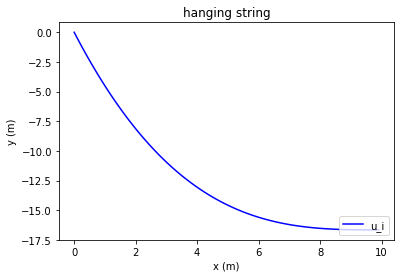

In [207]:
#constants
N = 100 #N value discussed above
L = 10 #length of string
T = 1 
f0 = -1
h = L/N

#boundary conditions
u_0 = 0


#x_i grid points
x_i = np.linspace(0,L,N+1)

#Build matrices
A=np.zeros((N-1,N-1))

for i in range(N-1):
    A[i,i] = -2
    if i==0:
        A[0,i+1]=1
    elif i==N-2:
        A[i,i-1]=1
        A[i,i]=-1
    else:
        A[i,i-1]=1
        A[i,i+1]=1

#print(A)

B=-h**2*f0*(1-x_i[1:-1]/L)/T*np.ones(N-1)
B[0]=B[0]-u_0
B[-1]=B[-1]
#print(B)
#find u_i at grid points
u_i = solve(A,B)



#insert u_i at boundaries
u_i_with_boundary = np.insert(u_i,0,u_0)
#u_i_with_boundary = np.append(u_i_with_boundary,u_N) no second boundary
#print(u_i_with_boundary)
#plot
plt.figure()
plt.title("hanging string")
plt.plot(x_i[:-1],u_i_with_boundary, 'b-', label='u_i')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(loc='lower right')
plt.show()


Here it can be observed that the string is fixed on the left boundary but as $x$ increases the string is acted upon by gravity and since there is no other boundary to hold it up it falls to a negative $y$ value. 


Next we want to look at the certain eigenvalue and eigenvectors the system possess. The point of this is to find the normal modes that the string could oscilate at. To do this we use the matrix A we defined above and solve it for a matrix C that takes the form 

 \begin{array}{ccc}
   m_1 & 0 & 0  \\
   0 & m_2 & 0 \\
   0 & 0 & m_3 \\
  \end{array} 


for a system where N=3.The matix C is obtained by multiplying N masses by the identity matrix. For N=3 to solve for eigenvalues and eigenvectors we solve the equation below. 

$$
\left[ {\begin{array}{ccc}
   2k & -k & 0  \\
   -k & 2k & -k \\
   0 & -k & k  \\
   0 & 0 & -k  \\
   0 & 0 & 0 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
    a_4 \\
    a_5 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   m_1 & 0 & 0  \\
   0 & m_2 & 0 \\
   0 & 0 & m_3 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$


For a N mass system the same set up applies except each matrix will have more components.
 

In [208]:
m=1 #for simplicity, all m values in the system will be equal to one 

C=m*np.identity(N-1) #Identity matrix multiplied by m

In [209]:
lamb, a = eigh(A, C)        # eigenvalues and eigenvectors  
print("eigenvalues (omega^2):", lamb)

eigenvalues (omega^2): [-3.99900318e+00 -3.99601371e+00 -3.99103457e+00 -3.98407072e+00
 -3.97512910e+00 -3.96421864e+00 -3.95135020e+00 -3.93653661e+00
 -3.91979264e+00 -3.90113498e+00 -3.88058222e+00 -3.85815487e+00
 -3.83387526e+00 -3.80776760e+00 -3.77985792e+00 -3.75017404e+00
 -3.71874555e+00 -3.68560378e+00 -3.65078176e+00 -3.61431421e+00
 -3.57623747e+00 -3.53658950e+00 -3.49540983e+00 -3.45273950e+00
 -3.40862105e+00 -3.36309846e+00 -3.31621709e+00 -3.26802370e+00
 -3.21856631e+00 -3.16789423e+00 -3.11605796e+00 -3.06310919e+00
 -3.00910068e+00 -2.95408628e+00 -2.89812083e+00 -2.84126011e+00
 -2.78356080e+00 -2.72508043e+00 -2.66587727e+00 -2.60601036e+00
 -2.54553936e+00 -2.48452456e+00 -2.42302677e+00 -2.36110730e+00
 -2.29882787e+00 -2.23625056e+00 -2.17343776e+00 -2.11045206e+00
 -2.04735627e+00 -1.98421327e+00 -1.92108600e+00 -1.85803740e+00
 -1.79513031e+00 -1.73242744e+00 -1.66999129e+00 -1.60788410e+00
 -1.54616778e+00 -1.48490385e+00 -1.42415338e+00 -1.36397693e+00
 -

In [210]:
print("eigenvectors are column vectors in:\n\n", a)

eigenvectors are column vectors in:

 [[ 0.00447567 -0.00894688 -0.01340917 ...  0.01117942 -0.00671211
  -0.00223811]
 [-0.00894688  0.01785809  0.02669812 ...  0.02228922 -0.01340917
  -0.00447567]
 [ 0.01340917 -0.02669812 -0.03974771 ...  0.03326021 -0.02007616
  -0.00671211]
 ...
 [ 0.01117942  0.02228922 -0.03326021 ...  0.13902469  0.14078362
  -0.14166584]
 [-0.00671211 -0.01340917  0.02007616 ...  0.14078362  0.14141863
  -0.14173649]
 [ 0.00223811  0.00447567 -0.00671211 ...  0.14166584  0.14173649
  -0.14177182]]


Next we will want to create the modes for the system using the eigenvalues and vectors found above.

In [226]:
u_i = np.zeros(N-1)
Acoeffs = np.linalg.solve(a,u_i_with_boundary[:-1])
t = np.linspace(0,t_total,1000)

omegas = np.sqrt(np.abs(lamb))
u_atoms = np.zeros((N-1,len(t)))

for i in range(N-1):
    for w in range(0,len(omegas)):
        u_atoms[i] = u_atoms[i] + Acoeffs[w]*a[i,w]*np.cos(omegas[w]*t)
        


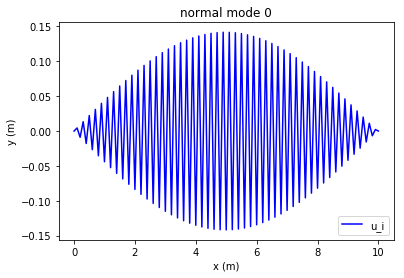

In [227]:
plot_mode_teq0(0,omegas,a,N-1)

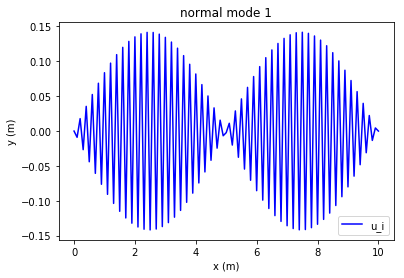

In [228]:
plot_mode_teq0(1,omegas,a,N-1)

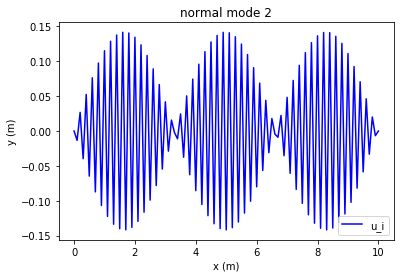

In [229]:
plot_mode_teq0(2,omegas,a,N-1)

I have plotted the first three modes of the string. More can be discovered by changing the first number in the function. After doing this we'll want to see how the Gaussian reacts with a string with only one boundary. To do this I animated the string over time using the easy animate package.  

In [187]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0, u1 = gaussian(x), gaussian(x)

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[N]=u2[N-1] #free end; set displacement of last atom to be same as the displacement of the previous atom
    u0, u1 = u1, u2
    data[i]=u2

data.shape


(201, 101)

In [188]:
file='string.mp4'
easyanimate_string(ta,data,file)

100%|██████████| 201/201 [01:02<00:00,  3.24it/s]


In [189]:
import imageio
imageio.plugins.ffmpeg.download()

In [190]:
playVideo(file)

It can be seen from the video above that the Gaussian does not invert the wave being relfected off the unfixed side of the string.

After Doing this we'll want to investigate a couple more initial conditions that will impact the motion of the string. The conditions that i will investigate are a Gaussian with a velocity in the left direction and the string being pinched in three secions, creating a tent like structure.  

In [203]:
L, N = 10, 100           # length of string, number of intervals
b = 1.0                    # beta^2
h = L/N

t_total = 20
N_t = 200 #number of time intervals
dt = t_total/N_t
t = 0
ta = np.linspace(0,t_total,N_t+1)

x = np.linspace(0, L, N+1)
u0 = gaussian(x)
u1 = gaussian(x+b*h)

data = np.zeros((N_t+1,N+1))  #columns are u at grid points
data[0]=u0
data[1]=u1

for i in range(N_t):
    u2 = wavemotion(u0, u1)
    u2[N]=u2[N-1] #free end; set displacement of last atom to be same as the displacement of the previous atom
    u0, u1 = u1, u2
    data[i]=u2


data.shape


(201, 101)

In [204]:
file='string2.mp4'
easyanimate_string(ta,data,file)

100%|██████████| 201/201 [00:53<00:00,  3.77it/s]


In [205]:
playVideo(file)

By observing the video above with a Gaussian with a velocity to the left it can clearly be observed again that the fixed point of the string inverts the wave where as the free end reflects the same wave and doesn't invert it. 